In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
nn = 20
num_grids = 20

In [3]:
load = loadmat("./gpuexp-10.mat")
numB = load["numB"]

In [4]:
fracdims = np.zeros((num_grids,num_grids))
cuts = np.zeros((num_grids,num_grids))
fracdimerr = np.zeros((num_grids,num_grids))

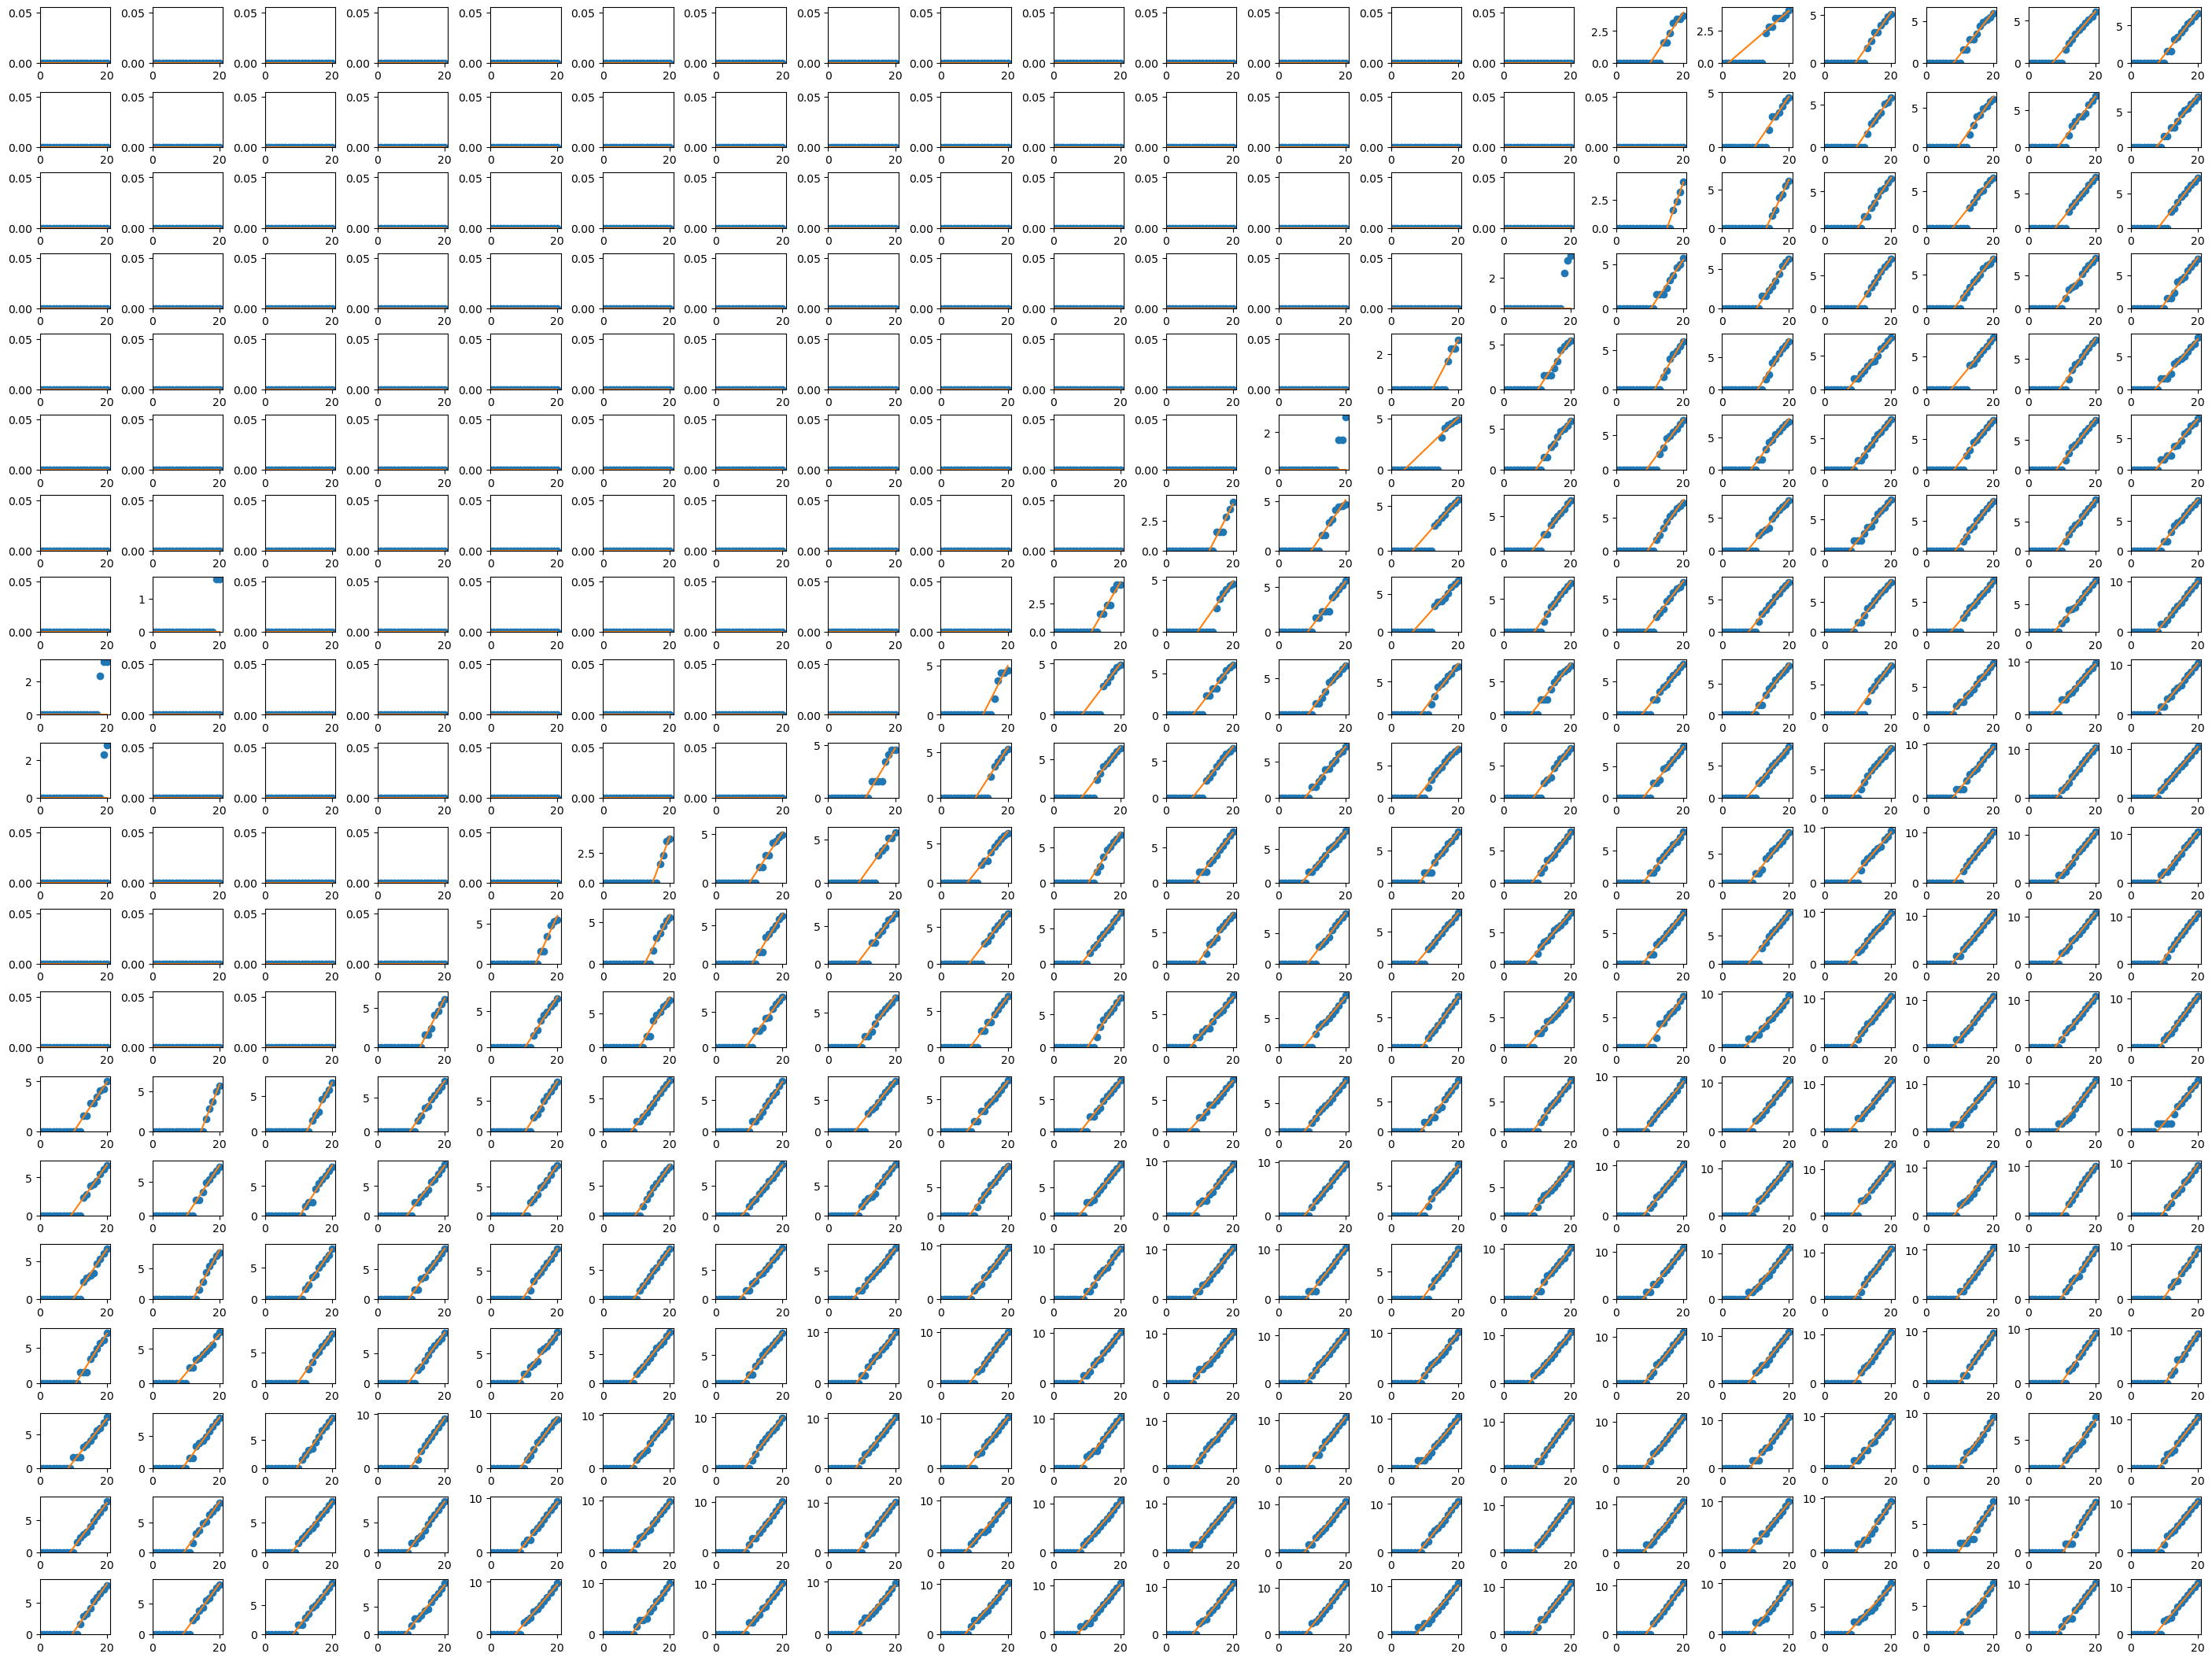

In [5]:
fig, axs = plt.subplots(num_grids,num_grids, figsize=(28, 21), constrained_layout=True)
for i in range(num_grids):
    for j in range(num_grids):
        axs[i, j].plot(np.arange(nn+1), np.log2(numB[i,j]),'o')
        if np.sum(np.log2(numB[i,j,:])>0) > 3:
            pp, VV = np.polyfit(np.arange(nn+1)[np.log2(numB[i,j,:])>0], np.log2(numB[i,j,:])[np.log2(numB[i,j,:])>0], 1, cov=True)
            slope, cut = pp
            fracdims[i,j] = slope
            cuts[i,j] = cut
            fracdimerr[i,j] = np.sqrt(VV[0][0])
        axs[i, j].plot(np.arange(nn+1), fracdims[i,j] * np.arange(nn+1) + cuts[i,j])
        axs[i, j].set_ylim(0,)
        axs[i, j].set_xlim(0,)
        #axs[i, j].set_title('pH of Comm. '+str(ii+1))
#plt.savefig('./figures/exp-4SI.pdf')

In [6]:
# Constants
l1 = 0.3
l2 = 0.5

# Define the function f(x)
def f(x, e1, e2):
    term1 = 2
    term2 = -e1 * (2 * np.pi / l1)**2 * np.cos(2 * np.pi * x / l1)
    term3 = -e2 * (2 * np.pi / l2)**2 * np.cos(2 * np.pi * x / l2)
    return term1 + term2 + term3

# Define a function to find the minimum value of f(x) for given e1 and e2
def min_f(e1, e2):
    res = minimize_scalar(lambda x: f(x, e1, e2), bounds=(0, 1), method='bounded')
    return res.fun

# Generate a grid of e1 and e2 values
e1_values = np.linspace(0, .008, 100)
e2_values = np.linspace(0, .02, 100)
E1, E2 = np.meshgrid(e1_values, e2_values)

# Calculate the minimum value of f(x) for each pair (e1, e2)
F_min = np.array([[min_f(e1, e2) for e1 in e1_values] for e2 in e2_values])

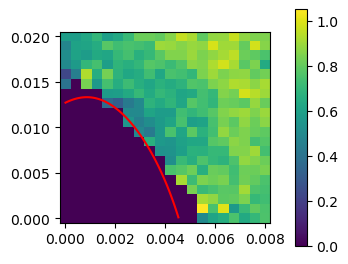

In [10]:
plt.figure(figsize=(3.375, 3.375/4*3), constrained_layout=True)
plt.imshow(fracdims.T, origin='lower',extent=(0-.0002, .008+.0002,0-.0005, .02+.0005), aspect=8/22)
plt.colorbar()
plt.contour(E1, E2, F_min, levels=[0],colors='red')
#plt.xlabel('Wavelength, $\lambda$'
#plt.ylabel('Amplitude, $\epsilon$')
plt.savefig('./figures/gpuexp-10.pdf')